In [3]:
%pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 77.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import datetime as dt

In [2]:
fi_data=pd.read_csv('finland_disturbance.csv',header=1)

In [3]:
no_data=pd.DataFrame([{'year':2021,'report_days':18,'year_days':365},
                      {'year':2022,'report_days':122,'year_days':365},
                      {'year':2023,'report_days':294,'year_days':365},
                      {'year':2024,'report_days':44,'year_days':53}],
                     index=[0,1,2,3])

In [4]:
se_data=pd.DataFrame([{'year':2023,'incidents':55,'year_days':365},
                      {'year':2024,'incidents':495,'year_days':366},
                      {'year':2025,'incidents':733,'year_days':120}],
                     index=[0,1,2])

In [5]:
def parse_date(input_str):
    return dt.datetime.strptime(input_str,'%d %B %Y')
def clean_table(df):
    return df.assign(
        disturbance_year=fi_data
        .Year.str.split(' ',expand=True)[0].astype('int32'),
        end_date =(fi_data
        .Year.str.split('by ',expand=True)[1].str.rstrip(')').fillna('31 December')+' '+fi_data
        .Year.str.split(' ',expand=True)[0]).apply(parse_date).dt.dayofyear,
        disturbances_Finland=fi_data
        .Finland.str.replace('Around ','').astype('int32'),
        disturbances_Outside=fi_data
        ['Finnish operators’ notifications outside of Finland']
        .str.replace('Around ','').astype('int32'),
        disturbances_Outside_weighted=fi_data
        ['Finnish operators’ notifications outside of Finland']
        .str.replace('Around ','').astype('int32')*365/(fi_data
        .Year.str.split('by ',expand=True)[1].str.rstrip(')').fillna('31 December')+' '+fi_data
        .Year.str.split(' ',expand=True)[0]).apply(parse_date).dt.dayofyear,
        disturbances_Finland_weighted=fi_data
        .Finland.str.replace('Around ','').astype('int32')*365/(fi_data
        .Year.str.split('by ',expand=True)[1].str.rstrip(')').fillna('31 December')+' '+fi_data
        .Year.str.split(' ',expand=True)[0]).apply(parse_date).dt.dayofyear
        )

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

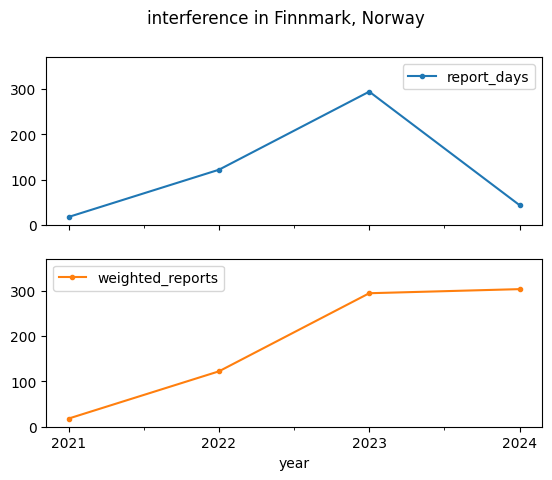

In [6]:
(no_data
    .set_index('year')
    .assign(weighted_reports=no_data.set_index('year').report_days.div(no_data.set_index('year').year_days)*365)
    .drop(columns='year_days')
    .plot(marker='.',ylim=[0,370],xticks=range(2021,2025),title='interference in Finnmark, Norway',subplots=True)
)
 #.report_days.plot(marker='.',ylim=[0,370],xticks=range(2021,2025),ylabel='days of interference in Finnmark, Norway')

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

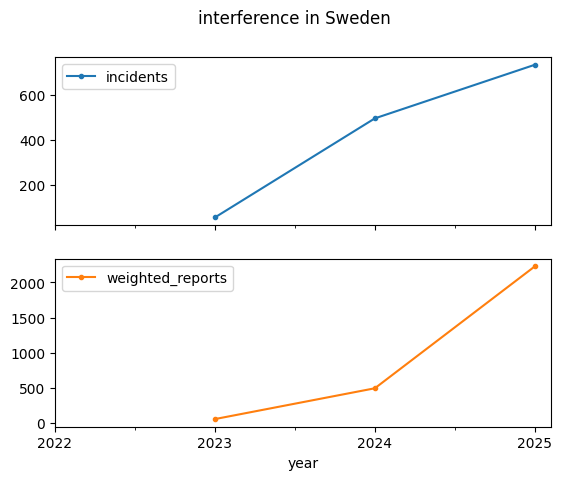

In [7]:
(se_data
    .set_index('year')
    .assign(weighted_reports=se_data.set_index('year').incidents.div(se_data.set_index('year').year_days)*365)
    .drop(columns='year_days')
    .plot(marker='.',xticks=range(2022,2026),title='interference in Sweden',subplots=True)#,ylim=[0,370]
)
 #.report_days.plot(marker='.',ylim=[0,370],xticks=range(2021,2025),ylabel='days of interference in Finnmark, Norway')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

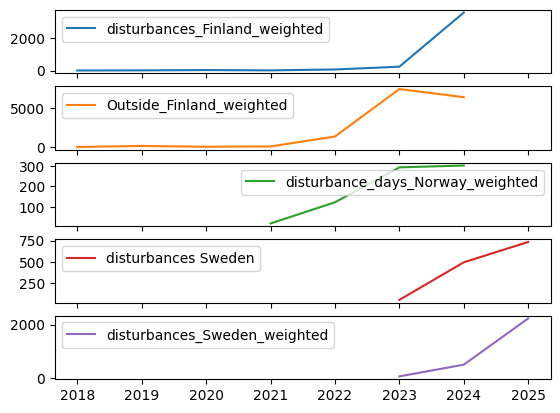

In [8]:
(fi_data
 .pipe(clean_table)
 .set_index('disturbance_year')
 [['disturbances_Finland_weighted','disturbances_Outside_weighted']]
 .merge(no_data
  .set_index('year')
    .assign(disturbance_days_Norway_weighted=no_data.set_index('year').report_days.div(no_data.set_index('year').year_days)*365)
   .drop(columns=['year_days','report_days']),
    left_index=True, right_index=True,how='outer')
 .rename(columns={'disturbances_Outside_weighted':'Outside_Finland_weighted'})
    .merge(se_data
     .set_index('year')
    .assign(disturbances_Sweden_weighted=se_data.set_index('year').incidents.div(se_data.set_index('year').year_days)*365)
    .drop(columns='year_days')  ,
    left_index=True, right_index=True,how='outer')
    .rename( columns={'incidents':'disturbances Sweden'})
    .plot(subplots=True)
)
 